In [96]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, Function, dsolve, Eq, exp

In [97]:
def f(x,y):
    return 4*np.exp(0.8*x) - 0.5*y

In [98]:
x = symbols('x') 
y = Function('y')
eq = Eq(y(x).diff(x), 4 * exp(0.8 * x) - 0.5 * y(x))
exact_solution = dsolve(eq, y(x), ics={y(0): 2})
exact_function = lambda x_val: float(exact_solution.rhs.subs(x, x_val))

print ('Exact value of function at x=4 ',exact_function(4))



Exact value of function at x=4  75.33896260915859


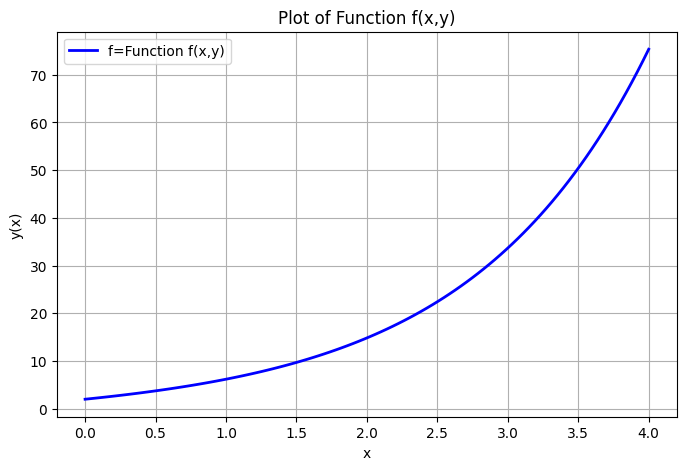

In [99]:
x_vals = np.linspace(0, 4, 100)
y_vals = [exact_function(val) for val in x_vals]

plt.figure(figsize=(8, 5))
plt.plot(x_vals, y_vals, label='f=Function f(x,y)', color='blue', linewidth=2)
plt.title("Plot of Function f(x,y)")
plt.xlabel("x")
plt.ylabel("y(x)")
plt.grid(True)
plt.legend()
plt.show()

In [111]:
def euler(h, x_end):
    x_values = np.arange(0, x_end + h, h)
    y_values = [2]

    for i in range(1, len(x_values)):
        y_values.append(y_values[i-1] + h * f(x_values[i-1], y_values[i-1]))
    return x_values, np.array(y_values)

In [101]:
x_euler, y_euler = euler(0.1, 4)
print(y_euler)

[ 2.          2.3         2.61831483  2.95680343  3.31746292  3.70244088
  4.11404872  4.55477604  5.02730624  5.53453328  6.0795799   6.66581728
  7.2968863   7.97672057  8.70957135  9.50003446 10.35307951 11.27408142
 12.26885467 13.34369026 14.50539583 15.76133901 17.11949445 18.58849468
 20.17768525 21.89718438 23.7579476  25.77183778 27.95170096 30.31144842
 32.86614573 35.63210899 38.62700931 41.86998577 45.38176792 49.18480843
 53.30342671 57.76396465 62.59495512 67.82730466 73.49449128]


In [102]:
def modified_euler(h, x_end):
    x_values = np.arange(0, x_end + h, h)
    y_values = [2]

    for i in range(1, len(x_values)):
        y_values.append(y_values[i-1] + h * f(x_values[i-1] + h/2, y_values[i-1] + h/2 * f(x_values[i-1], y_values[i-1])))
    return x_values, np.array(y_values)

In [103]:
x_mid, y_mid = modified_euler(0.1, 4)
print(y_mid)

[ 2.          2.30882431  2.63643499  2.98473478  3.3557684   3.75173517
  4.17500273  4.62812166  5.11384152  5.63512803  6.1951817   6.79745797
  7.44568905  8.14390748  8.89647164  9.70809342 10.58386808 11.52930666
 12.55037102 13.65351174 14.84570929 16.13451845 17.5281165  19.03535543
 20.66581841 22.42988101 24.33877743 26.40467233 28.64073858 31.06124143
 33.68162974 36.51863483 39.5903774  42.91648354 46.51821025 50.41858146
 54.64253536 59.21708401 64.17148622 69.53743479 75.34925942]


In [104]:
def runge_kutta(h, x_end):
    x_values = np.arange(0, x_end + h, h)
    y_values = [2]

    for i in range(1, len(x_values)):
        k1 = f(x_values[i-1], y_values[i-1])
        k2 = f(x_values[i-1] + h/2, y_values[i-1] + h/2 * k1)
        k3 = f(x_values[i-1] + h/2, y_values[i-1] + h/2 * k2)
        k4 = f(x_values[i-1] + h, y_values[i-1] + h * k3)
        y_values.append(y_values[i-1] + h * (k1 + 2*k2 + 2*k3 + k4)/6)
    return x_values, np.array(y_values)

In [105]:
x_rk4, y_rk4 = runge_kutta(0.1, 4)
print(y_rk4)

[ 2.          2.30879011  2.63636249  2.98461973  3.35560638  3.75152159
  4.17473274  4.62779017  5.11344315  5.63465706  6.19463203  6.79682312
  7.44496207  8.14308092  8.8955375   9.7070431  10.58269233 11.5279955
 12.54891367 13.6518966  14.84392379 16.13254901 17.52594846 19.0329729
 20.66320421 22.42701653 24.33564254 26.40124522 28.63699563 31.05715705
 33.67717624 36.51378217 39.58509307 42.91073231 46.51195394 50.41177872
 54.63514137 59.20905024 64.16276005 69.52795924 75.33897273]


In [106]:
h_values = 1/10**(np.arange(0,7,1))
x_end = 4

#exact_function_array = np.vectorize(lambda x_val: float(exact_solution.rhs.subs(x, x_val)))

euler_errors = []
modified_euler_errors = []
runge_kutta_errors = []

euler_costs = []
modified_euler_costs = []
runge_kutta_costs = []

In [117]:
h_values = 1/10**(np.arange(0,7,1))
h_values

array([1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06])

In [124]:
exactvalue = exact_function(4)
for h in h_values:
    x_euler, y_euler = euler(h, x_end)
    euler_errors.append(np.abs((y_euler[-1] - exact_function(x_end))/exact_function(x_end)))
    euler_costs.append(len(x_euler))


In [121]:
exact_function(x_end)

75.33896260915859

In [125]:
euler_errors

[np.float64(18.489651309309465),
 np.float64(1.8444713271930055),
 np.float64(0.18409686609209075),
 np.float64(0.04206394256203794),
 np.float64(0.0018405518387822895),
 np.float64(0.00018405480261662888),
 np.float64(4.2055171363131194e-05),
 np.float64(55.84931129984912),
 np.float64(72.49449128196558),
 np.float64(74.1548657430665),
 np.float64(74.38102655172062),
 np.float64(74.3371220573198),
 np.float64(74.33877855435597),
 np.float64(74.33900466432995),
 np.float64(55.84931129984912),
 np.float64(72.49449128196558),
 np.float64(74.1548657430665),
 np.float64(74.38102655172062),
 np.float64(74.3371220573198),
 np.float64(74.33877855435597),
 np.float64(74.33900466432995),
 np.float64(0.24541951029017448),
 np.float64(0.024482303224185653),
 np.float64(0.002443581112831928),
 np.float64(0.0005583291978714401),
 np.float64(2.443027850450575e-05),
 np.float64(2.443022789834038e-06),
 np.float64(5.582127747272532e-07),
 np.float64(0.24541951029017448),
 np.float64(0.0244823032241856

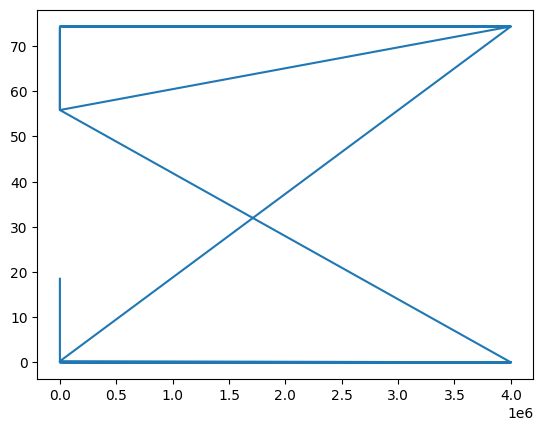

In [126]:
plt.plot(euler_costs, euler_errors)

In [109]:

    x_mid, y_mid = modified_euler(h, x_end)
    modified_euler_errors.append(np.abs(y_mid[-1] - exact_function(x_end)/exact_function(x_end)))
    modified_euler_costs.append(len(x_mid))

    x_rk4, y_rk4 = runge_kutta(h, x_end)
    runge_kutta_errors.append(np.abs(y_rk4[-1] - exact_function(x_end)/exact_function(x_end)))
    runge_kutta_costs.append(len(x_rk4))

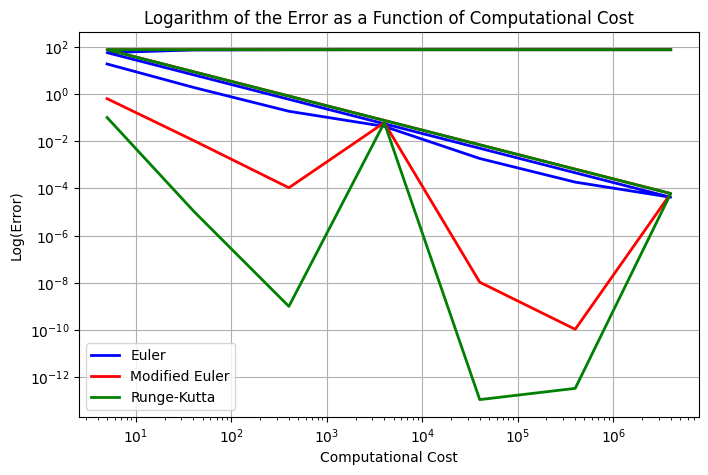

In [110]:
plt.figure(figsize=(8, 5))
plt.loglog(euler_costs, euler_errors, label='Euler', color='blue', linewidth=2)
plt.loglog(modified_euler_costs, modified_euler_errors, label='Modified Euler', color='red', linewidth=2)
plt.loglog(runge_kutta_costs, runge_kutta_errors, label='Runge-Kutta', color='green', linewidth=2)
plt.title("Logarithm of the Error as a Function of Computational Cost")
plt.xlabel("Computational Cost")
plt.ylabel("Log(Error)")
plt.grid(True)
plt.legend()
plt.show()